In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
# Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
data = pd.read_csv('email.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data['transform_text'] = data['Message'].str.lower()
# Tokenization
data['transform_text'] = data['transform_text'].apply(word_tokenize)

# Removing special characters
data['transform_text'] = data['transform_text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

# Removing stop words and punctuation
stop_words = set(stopwords.words('english'))
data['transform_text'] = data['transform_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

# Stemming
ps = PorterStemmer()
data['transform_text'] = data['transform_text'].apply(lambda x: [ps.stem(word) for word in x])

# Convert the preprocessed text back to string
data['transform_text'] = data['transform_text'].apply(lambda x: ' '.join(x))

# Display the preprocessed data
print(data[['Message', 'transform_text']].head())


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\PC/nltk_data'
    - 'C:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\PC\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [3]:
df['label'] = df['Category'].map({'ham': 1, 'spam': 0})
df.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


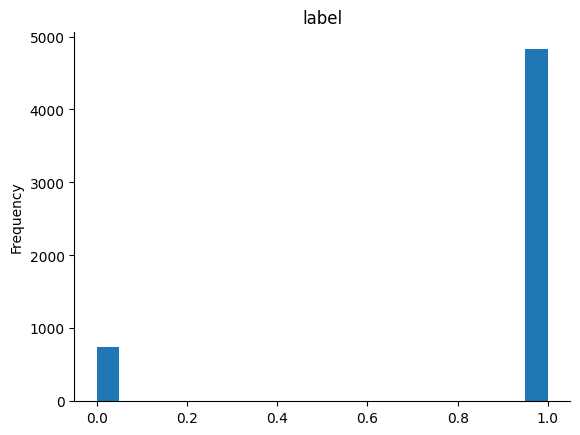

In [4]:
from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.shape

(5573, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  5573 non-null   object 
 1   Message   5573 non-null   object 
 2   label     5572 non-null   float64
dtypes: float64(1), object(2)
memory usage: 130.7+ KB


## Checking Null values

In [7]:
df.isnull().sum()

Category    0
Message     0
label       1
dtype: int64

In [8]:
df.dropna(inplace=True)

### Checking duplicate values

In [9]:
df.duplicated().sum()

415

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

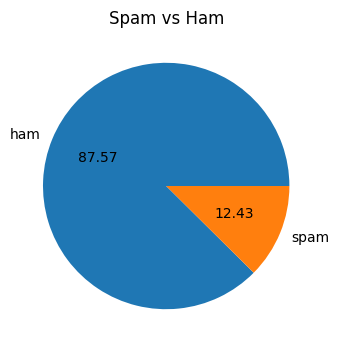

In [12]:
plt.figure(figsize=(6,4))
plt.pie(df['label'].value_counts(), autopct="%.2f", labels=['ham', 'spam'] )
plt.title("Spam vs Ham")
plt.show()

In [13]:
def countword(text):
    text = text.split(" ")
    return len(text)

In [14]:
df['total_words'] = df['Message'].apply(countword)

In [15]:
def countword(text):
    return len(text)

In [16]:
df['total_char'] = df['Message'].apply(countword)

In [17]:
# df.drop(columns='text', inplace=True)

In [18]:
# pip install wordcloud

In [19]:
from wordcloud import WordCloud

In [20]:
wc = WordCloud(width=100, height=100, max_font_size=15, background_color='white')
ham_ms= wc.generate(df[df['Category']=='ham']['Message'].str.cat(sep=" "))

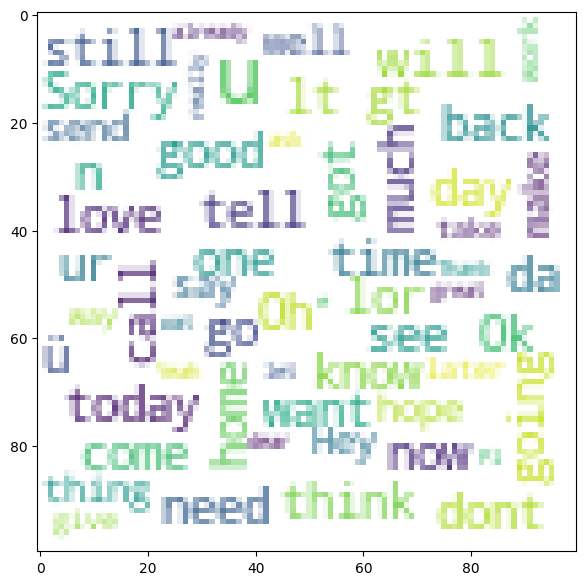

In [21]:
plt.figure(figsize=(10,7))
plt.imshow(ham_ms)

In [22]:
wc = WordCloud(width=150, height=150, max_font_size=15, background_color='white')
spam_ms= wc.generate(df[df['Category']=='spam']['Message'].str.cat(sep=" "))

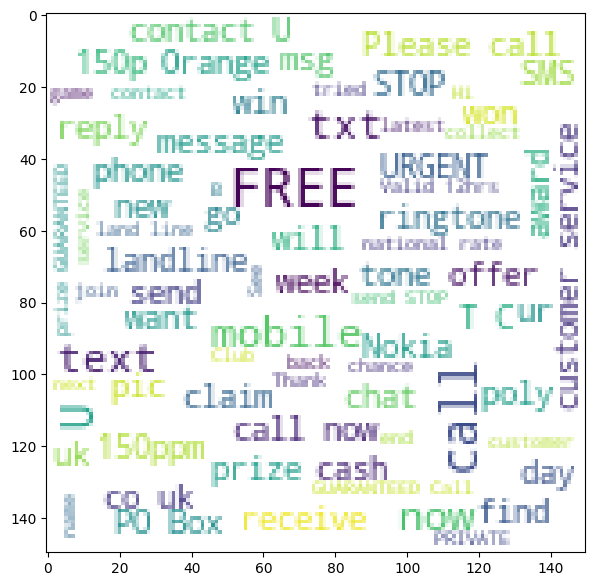

In [23]:
plt.figure(figsize=(10,7))
plt.imshow(spam_ms)

In [24]:
df.select_dtypes(include='number').describe()

,label,total_words,total_char
count,5157.000000,5157.000000,5157.000000
mean,0.875703,15.488268,79.103936
std,0.329952,11.200969,58.382922
min,0.000000,1.000000,2.000000
25%,1.000000,7.000000,36.000000
50%,1.000000,12.000000,61.000000
75%,1.000000,22.000000,118.000000
max,1.000000,171.000000,910.000000


<Axes: >

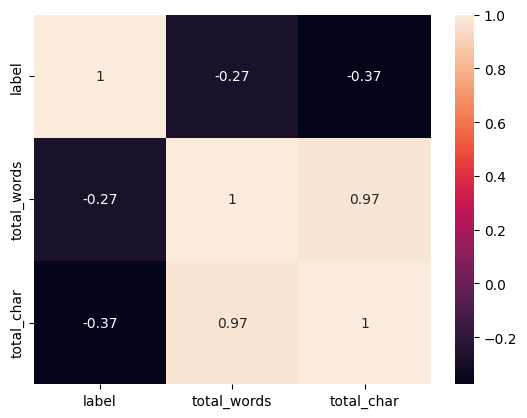

In [25]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [26]:
df.dropna(inplace=True)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np 

In [28]:
X = df['Message']
y = df['label']

## Train test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 15)

### Feature extraction

In [30]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

x_train_num = feature_extraction.fit_transform(X_train)
x_test_num = feature_extraction.transform(X_test)

## building model

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(x_train_num, y_train)

LogisticRegression()

In [33]:
test_prediction = lr.predict(x_test_num)
test_accuracy = accuracy_score(test_prediction, y_test)
print('Accuracy for Testing is:', test_accuracy * 100)

Accuracy for Testing is: 97.28682170542635


In [34]:
# lr.predict("My name is aftab alam i am giving free laptop just in 1000 rupess")

In [37]:
from sklearn.ensemble import  RandomForestClassifier

In [40]:
rf = RandomForestClassifier()
rf.fit(x_train_num, y_train)

RandomForestClassifier()

In [44]:
r_pred = rf.predict(x_test_num)
accuracy_score(r_pred, y_test)
classification_report(r_pred, y_test)

'              precision    recall  f1-score   support\n\n         0.0       0.88      0.99      0.93       101\n         1.0       1.00      0.99      0.99       931\n\n    accuracy                           0.99      1032\n   macro avg       0.94      0.99      0.96      1032\nweighted avg       0.99      0.99      0.99      1032\n'

In [35]:
import pickle

In [45]:
# pickle.dump(rf, open("model2.pkl", "wb"))

In [36]:
# pickle.dump(feature_extraction, open("vectorizer.pkl", 'wb'))
# pickle.dump(lr, open("model.pkl", "wb"))

In [47]:
x_test_num

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6626 stored elements and shape (1032, 7419)>

In [46]:
rf.predict(['Earn $5,000 a week working from home. No experience needed! Apply now at [link] and start earning today."'])

ValueError: could not convert string to float: 'Earn $5,000 a week working from home. No experience needed! Apply now at [link] and start earning today."'

In [51]:
tfidf = TfidfVectorizer(max_features=3000)
tfidf.fit(X_train)

TfidfVectorizer(max_features=3000)

In [52]:
def predict_email(email):
    # Convert email into numerical vector using the trained TF-IDF vectorizer
    email_vector = tfidf.transform([email])
    
    # Convert sparse matrix to dense array
    email_vector_dense = email_vector.toarray()
    
    # Use the trained SVM model to make predictions
    prediction = rf.predict(email_vector_dense)
    
    # Print the prediction
    if prediction[0] == 1:
        print("The email is predicted as spam.")
    else:
        print("The email is predicted as ham.")

# Get user input for email
user_email = input("Enter the email text: ")

# Predict whether the input email is spam or ham
predict_email(user_email)

Enter the email text:  Earn $5,000 a week working from home. No experience needed! Apply now at [link] and start earning today."


ValueError: X has 3000 features, but RandomForestClassifier is expecting 7419 features as input.